#뉴럴네트워크 이진분류 (당뇨병 데이터셋)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras

##1.데이터 준비

In [2]:
! wget https://raw.githubusercontent.com/devdio/datasets/refs/heads/main/diabetes.csv

--2025-01-02 06:49:15--  https://raw.githubusercontent.com/devdio/datasets/refs/heads/main/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  23.31K  --.-KB/s    in 0s      

2025-01-02 06:49:16 (90.6 MB/s) - ‘diabetes.csv’ saved [23873/23873]



In [5]:
df = pd.read_csv('/content/diabetes.csv')
df.shape

(768, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# 이상치 데이터 전처리 하세욥

##2.분리

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y ,random_state=42)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

##3.데이터 전처리

In [14]:
# 결측치 확인
X_train.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0


### 스케일링

In [15]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
# 학습
ss.fit(X_train)
# 데이터 변경
X_train_s = ss.transform(X_train)

In [17]:
y_train_n = y_train.to_numpy()

In [20]:
X_train_s.shape

(614, 8)

##4.모델 만들기

In [50]:
from keras import layers

model = keras.Sequential([
    layers.Input(shape=(8,)),
    layers.Dense(units=5, activation='relu'),
    layers.Dense(units=5, activation='relu'),
    layers.Dense(units=3, activation='relu'),
    layers.Dense(units=1, activation='sigmoid'),
    # 이진분류일 때는 마지막 출력 레이어의 활성함수가 시그모이드임
    # 0 하고 1 사이의 확률값으로 나와야하기 때문에
])

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                     │ (None, 5)                   │              45 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 5)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 3)                   │              18 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 97 (388.00 B)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 0 (0.00 B)

In [51]:
model.compile(
    loss='binary_crossentropy',
    optimizer = 'adam',
    # 이진분류는 정확도를 보고 판단
    metrics=['acc']
)

In [52]:
epochs = 150
batch_size = 32

history = model.fit(X_train_s, y_train_n,
                    epochs = epochs,
                    batch_size=batch_size,
                    validation_split=0.2)

Epoch 1/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - acc: 0.5027 - loss: 0.6943 - val_acc: 0.6098 - val_loss: 0.6916
Epoch 2/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.5898 - loss: 0.6917 - val_acc: 0.6341 - val_loss: 0.6896
Epoch 3/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6249 - loss: 0.6896 - val_acc: 0.6423 - val_loss: 0.6876
Epoch 4/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6468 - loss: 0.6870 - val_acc: 0.6423 - val_loss: 0.6858
Epoch 5/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.6406 - loss: 0.6854 - val_acc: 0.6423 - val_loss: 0.6840
Epoch 6/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.6578 - loss: 0.6825 - val_acc: 0.6423 - val_loss: 0.6822
Epoch 7/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.6643 - loss: 0.6800 - val_acc: 0.6423 - val_loss: 0.6805
Epoch 8/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6204 - loss: 0.6822 - val_acc: 0.6423 - val_loss: 0.6790
Epoch 9/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.674

In [53]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(16,8))
  plt.subplot(1,2,1)
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.plot(hist['epoch'], hist['loss'], label='train_loss')
  plt.plot(hist['epoch'], hist['val_loss'], label='val_loss')
  plt.title('Loss Curve')
  plt.legend()

  plt.subplot(1,2,2)
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.plot(hist['epoch'], hist['acc'], label='train_acc')
  plt.plot(hist['epoch'], hist['val_acc'], label='val_acc')
  plt.title('acc Curve')
  plt.legend()

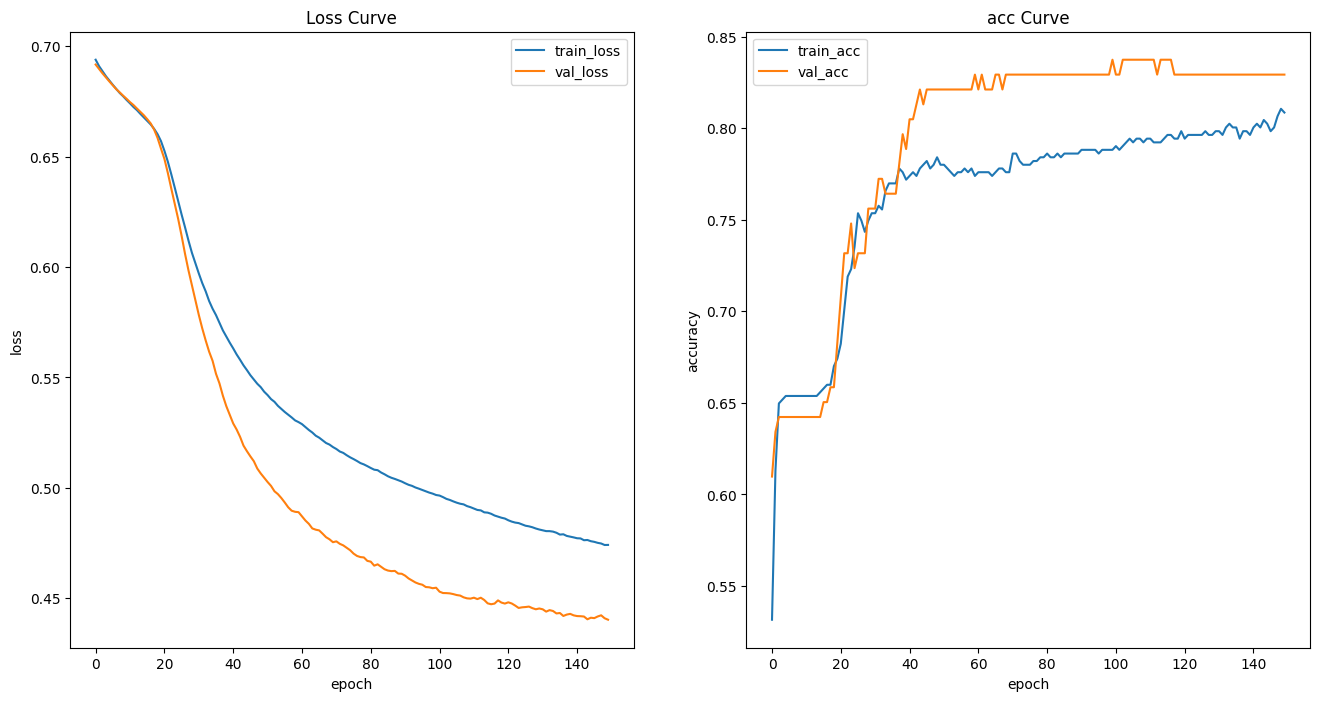

In [55]:
plot_history(history)

##테스트 데이터

In [57]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
44,7,159,64,0,0,27.4,0.294,40
672,10,68,106,23,49,35.5,0.285,47
700,2,122,76,27,200,35.9,0.483,26
630,7,114,64,0,0,27.4,0.732,34
81,2,74,0,0,0,0.0,0.102,22


In [67]:
X_test_s = ss.transform(X_test)
y_test_n = y_test.to_numpy()

In [62]:
y_pred = model.predict(X_test_s)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [64]:
y_pred[:5]

array([[0.7528245 ],
       [0.26984873],
       [0.19466352],
       [0.24884191],
       [0.19406189]], dtype=float32)

In [70]:
# y_pred.flatten()
y_pred = (y_pred.reshape(-1) > 0.5).astype('int')
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0])

In [68]:
y_test_n[:5]

array([0, 0, 0, 1, 0])

##평가지표

In [71]:
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import precision_score, f1_score
from sklearn.metrics import confusion_matrix

def print_metrics(y_true, y_pred):
  acc = accuracy_score(y_true, y_pred)
  re = recall_score(y_true, y_pred)
  pre = precision_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)

  print("acc:", acc)
  print("recall:", np.around(re, 4))
  print("precision:", np.around(pre, 4))
  print("f1:", np.around(f1, 4))

  cfm = confusion_matrix(y_true, y_pred)
  s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar=False)
  s.set(xlabel='Prediction', ylabel='Actual')
  plt.show()

acc: 0.7402597402597403
recall: 0.5741
precision: 0.6458
f1: 0.6078


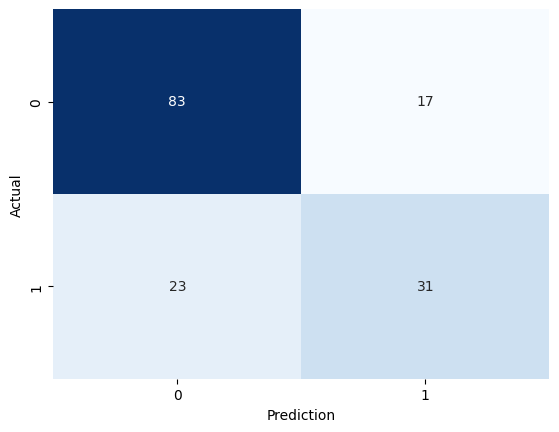

In [72]:
print_metrics(y_test_n, y_pred)

# 끝